In [1]:
# Step 1: Install required libraries
!pip install -q openai
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q torch torchvision torchaudio
!pip install -q Pillow
!pip install -q matplotlib


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.4 MB/s eta 0:00:00


In [2]:
from google.colab import files

uploaded = files.upload()


Saving ElevenLabs_2025-06-12T03_52_24_Liam_pre_sp100_s50_sb75_v3.mp3 to ElevenLabs_2025-06-12T03_52_24_Liam_pre_sp100_s50_sb75_v3.mp3


In [3]:
import whisper

# Load the small model for fast inference (can use 'base', 'small', 'medium', 'large')
model = whisper.load_model("small")

# Get the uploaded filename
filename = list(uploaded.keys())[0]

# Transcribe
result = model.transcribe(filename)
print("🎧 Transcribed Text:")
print(result["text"])


100%|███████████████████████████████████████| 461M/461M [00:06<00:00, 74.4MiB/s]


🎧 Transcribed Text:
 How do you find the apothem of a regular pentagon?


Saving ChatGPT Image Jun 11, 2025, 08_49_19 PM.png to ChatGPT Image Jun 11, 2025, 08_49_19 PM.png


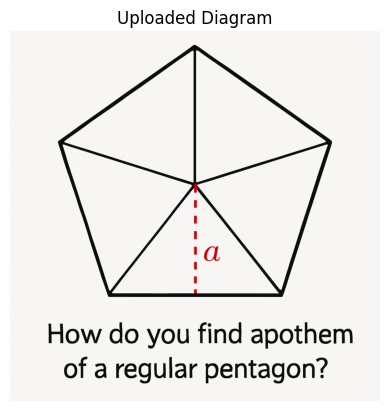

In [4]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

uploaded_image = files.upload()

# Load and show the image
image_path = list(uploaded_image.keys())[0]
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.title("Uploaded Diagram")
plt.show()


In [5]:
!pip install -q google-generativeai


In [6]:
import google.generativeai as genai

# Replace with your actual API key
genai.configure(api_key="")


In [7]:
from PIL import Image
import io

# Load image and transcribed text
transcribed_text = result['text']  # From Step 2
img = image  # From Step 3

# Convert image to bytes
img_byte_array = io.BytesIO()
img.save(img_byte_array, format='PNG')
img_bytes = img_byte_array.getvalue()

# Create content for Gemini
model = genai.GenerativeModel('gemini-1.5-flash')

response = model.generate_content([
    {"text": f"Explain the student's question: '{transcribed_text}' using the image below."},
    {"mime_type": "image/png", "data": img_bytes}
])

# Show the explanation
print("📚 AI Explanation:")
print(response.text)

📚 AI Explanation:
The student is asking how to calculate the length of the apothem ('a' in the diagram) of a regular pentagon.  The apothem is the distance from the center of the pentagon to the midpoint of any of its sides.  The image shows a regular pentagon with all its lines of symmetry drawn in, clearly highlighting the apothem.  The question seeks a method or formula to determine the value of 'a' given information about the pentagon (such as side length or radius).



# Final Notes:
This prototype demonstrates a multimodal AI educational tool using:
- 🔊 Voice input → transcribed with Whisper
- 🖼️ Diagram → analyzed with Gemini Pro Vision
- 🤖 AI explanation generated contextually

Future work:
- Add live webcam input or screen drawing
- Deploy to a web/mobile interface using Streamlit or Flutter
- Enable diagram feedback for step-by-step guidance


Option 1: Gradio Web App in Colab

In [8]:
# ✅ Install required packages
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q gradio google-generativeai
!apt-get install -y ffmpeg

# ✅ Import libraries
import gradio as gr
import whisper
from PIL import Image
import io
import numpy as np
import soundfile as sf
import google.generativeai as genai

# ✅ Configure your Gemini API key
genai.configure(api_key="")  # Replace with your key

# ✅ Load models
whisper_model = whisper.load_model("base")  # or "tiny" for faster results
vision_model = genai.GenerativeModel("gemini-1.5-flash")

# ✅ Main multimodal function
def explain_diagram(audio, image):
    try:
        if audio is None or image is None:
            return "⚠️ Please upload both audio and image.", "⚠️ Missing input."

        # Convert audio numpy array to WAV
        audio_path = "/tmp/audio.wav"
        sf.write(audio_path, audio[1], audio[0])  # data, samplerate

        # Transcribe audio using Whisper
        result = whisper_model.transcribe(audio_path)
        question = result.get("text", "").strip()

        if not question:
            return "❌ Could not transcribe your voice.", "❌ No question found."

        # Convert image to bytes for Gemini
        image_obj = Image.fromarray(image)
        img_byte_array = io.BytesIO()
        image_obj.save(img_byte_array, format='PNG')
        img_bytes = img_byte_array.getvalue()

        # Generate explanation using Gemini
        response = vision_model.generate_content([
            {"text": f"Explain the student's question: '{question}' using the image below."},
            {"mime_type": "image/png", "data": img_bytes}
        ])

        return question, response.text

    except Exception as e:
        return f"❌ Error: {str(e)}", "❌ AI could not generate an explanation."

# ✅ Gradio UI
demo = gr.Interface(
    fn=explain_diagram,
    inputs=[
        gr.Audio(type="numpy", label="🎤 Speak Your Question"),
        gr.Image(type="numpy", label="🖼️ Upload Diagram")
    ],
    outputs=[
        gr.Textbox(label="📝 Transcribed Question"),
        gr.Textbox(label="💡 AI Explanation")
    ],
    title="Multimodal AI Tutor",
    description="🎓 Speak your question and upload a diagram. AI will explain it using Whisper + Gemini."
)

demo.launch(share=True)  # Public link for testing


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


100%|████████████████████████████████████████| 139M/139M [00:00<00:00, 281MiB/s]


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9e6e39665b0f6d545b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
